#### 导入库

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier as DTC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#### 数据探索

In [2]:
data = load_breast_cancer()

#### 划分数据集

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.3,random_state=42)

#### 调参前模型效果

In [4]:
dtc = DTC(random_state=42)
dtc = dtc.fit(X_train,y_train)

score_pre = cross_val_score(dtc,X_train,y_train,cv=5).mean()
score_pre

0.909620253164557

#### 学习率调参

The_best_te:0.9649122807017544 
The_best_tr:1.0


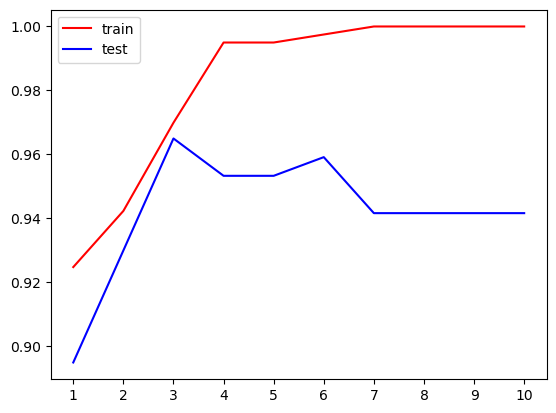

In [6]:
tr = []
te = []

for i in range(10):
    dtc = DTC(random_state=42
             ,max_depth=i+1)
    dtc = dtc.fit(X_train, y_train)
    score_tr = dtc.score(X_train, y_train)
    score_te = dtc.score(X_test, y_test)
    
    tr.append(score_tr)
    te.append(score_te)
    
print(f"The_best_te:{max(te)} \nThe_best_tr:{max(tr)}")
plt.plot(range(1,11),tr,color='red',label='train')
plt.plot(range(1,11),te,color='blue',label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()

#### 网格搜索调参

In [7]:
params = {
    "criterion": ("gini", "entropy"),
    "splitter": ("best", "random"),
    "min_samples_split": range(2, 12, 1),  # 分裂内部节点所需的最小样本数
    "min_samples_leaf": range(1, 11, 1),  # 叶节点最小样本数
    "min_impurity_decrease": np.linspace(0, 0.5, 10),  # 提前停止树增长的阈值
    "max_features": np.arange(1, 20, 1)  # 每个分裂最多考虑的特征数
}

In [8]:
dtc = DTC(max_depth=3,random_state=42)

In [9]:
GS = GridSearchCV(dtc,params,cv=10)

In [10]:
GS.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'min_impurity_decrease': array([0.        , 0.05555556, 0.11111111, 0.16666667, 0.22222222,
       0.27777778, 0.33333333, 0.38888889, 0.44444444, 0.5       ]),
                         'min_samples_leaf': range(1, 11),
                         'min_samples_split': range(2, 12),
                         'splitter': ('best', 'random')})

In [11]:
GS.best_params_

{'criterion': 'entropy',
 'max_features': 19,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [49]:
GS.best_score_

0.9371794871794872

In [12]:
dtc = DTC(max_depth=3
          ,criterion='gini'
          ,max_features=19
          ,min_samples_leaf=5
          ,min_samples_split=2
          ,splitter='random'
          ,random_state=42)

dtc = dtc.fit(X_train,y_train)
dtc_tr_score = dtc.score(X_train,y_train)
dtc_te_score = dtc.score(X_test,y_test)

In [13]:
dtc_tr_score

0.9195979899497487

In [14]:
dtc_te_score

0.9181286549707602

#### 树的可视化

In [8]:
from sklearn import tree
import graphviz

# import os
# path_to_graphviz = r"E:\Graphviz\bin" 
# os.environ["PATH"] += os.pathsep + path_to_graphviz

In [9]:
dtc = tree.DecisionTreeClassifier(max_depth=3
                                  ,criterion='gini'
                                  ,random_state=42)

dtc = dtc.fit(X_train,y_train)

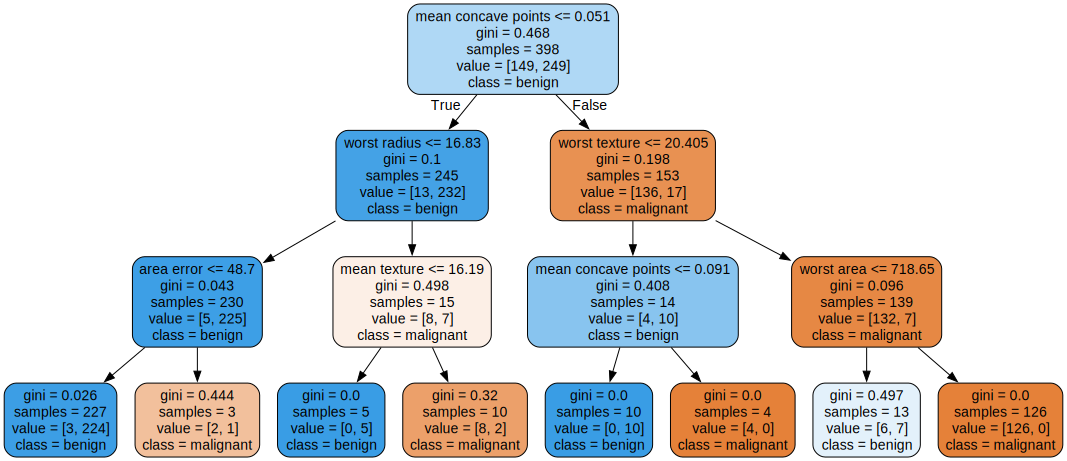

In [10]:
dot_data = tree.export_graphviz(dtc
                                ,feature_names=data.feature_names
                                ,class_names=data.target_names
                                ,filled=True
                                ,rounded=True
)
graph = graphviz.Source(dot_data)
graph

#### 练习

* 利用今天所学的方法对随机森林模型进行调参

In [69]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc = RFC(n_estimators=100,random_state=42)
score_pre = cross_val_score(rfc,X_train,y_train,cv=5).mean()
score_pre

0.9496518987341773

In [ ]:
data